# Descriptive Stats - Aerofit Case Study

### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

### Dataset link: [Aerofit_treadmill.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

### What good looks like?

* Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
* Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
* Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
* Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
* Check correlation among different factors using heat maps or pair plots.
* With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
* Customer Profiling - Categorization of users.
* Probability- marginal, conditional probability.
* Some recommendations and actionable insights, based on the inferences.


### Evaluation Criteria

* Defining Problem Statement and Analysing basic metrics (10 Points)
  * Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
* Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)
* Visual Analysis - Univariate & Bivariate (30 Points)
  * For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
  * For categorical variable(s): Boxplot (10 Points)
  * For correlation: Heatmaps, Pairplots(10 Points)
* Missing Value & Outlier Detection (10 Points)
* Business Insights based on Non-Graphical and Visual Analysis (10 Points)
  * Comments on the range of attributes
  * Comments on the distribution of the variables and relationship between them
  * Comments for each univariate and bivariate plot
* Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

### Disclaimer
This analysis is based on the data provided and reflects the state of the dataset as of the time of the analysis. The insights and recommendations are derived solely from my point of view and the dataset in question do not necessarily represent the broader operations or circumstances of the company. The analysis assumes the accuracy of the data as received and has not been independently verified. Future analyses may yield different insights as new data becomes available or as business conditions change.

### Note on Results
Due to the large volume of results generated by this analysis, only a subset has been presented here to illustrate the key trends and patterns. Specifically, the top 10 to 15 results have been included as screenshots to provide a snapshot of the most relevant findings. For a complete view of the data and to explore additional insights, please refer to the full dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
!gdown 1M-VFm8ruzCBebFYQTN4KF2aF-2hTn_tw

Downloading...
From: https://drive.google.com/uc?id=1M-VFm8ruzCBebFYQTN4KF2aF-2hTn_tw
To: /content/aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 16.4MB/s]


In [ ]:
df = pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# #1. Problem Statement

#### Answer
* Which type of person would buy one of these KP281, KP481, or KP781 treadmills, given Age, Gender, Education, MaritalStatus, Usage,	Fitness, Income,	Miles


# #2. Analysing basic metrics
* Non-Graphical Analysis: Structure & characteristics of the dataset, shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary, Value counts and unique attributes, missing values

In [ ]:
df.shape

(180, 9)

In [ ]:
# Display the data types and memory usage of each column
df.info()
df.memory_usage()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,0
Index,128
Product,1440
Age,1440
Gender,1440
Education,1440
MaritalStatus,1440
Usage,1440
Fitness,1440
Income,1440
Miles,1440


In [ ]:
# check percentage of missing values in dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
Product,0.0
Age,0.0
Gender,0.0
Education,0.0
MaritalStatus,0.0
Usage,0.0
Fitness,0.0
Income,0.0
Miles,0.0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Generate a summary for categorical features
categorical_summary = df.describe(include=['object', 'category'])
categorical_summary

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
# Generate summary statistics for numerical columns
summary_statistics = df.describe()
summary_statistics

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


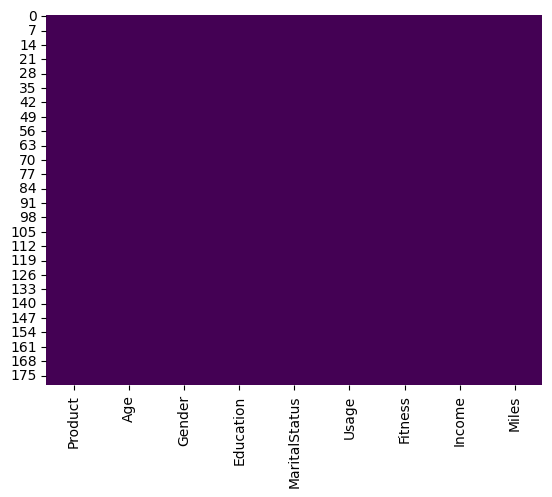

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Answer
* Shape: The dataset has 180 rows and 9 columns.
* Data Types: The dataset contains a mix of integer and object data types.
* Memory Usage: The dataset uses a total of 12.8 kilobytes of memory.
* Missing Values: None.

# #3. Outlier Detection
* Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
* Outliers can be detected using statistical methods such as the IQR method or visualized using plots like box plots.


In [ ]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [ ]:
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [ ]:
colors = ['peachpuff', 'orange', 'tomato']
my_pallette = {"KP281": "g", "KP481": "b", "KP781":"m"}

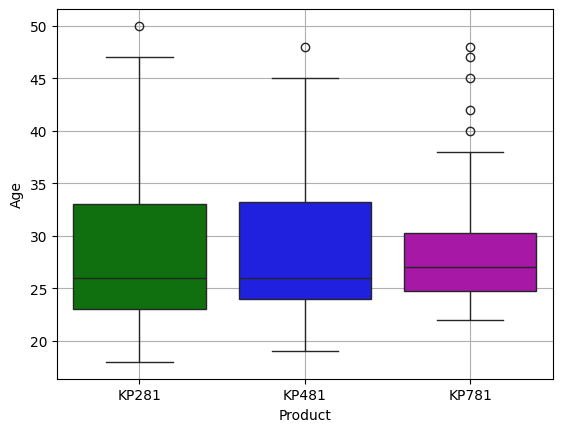

In [ ]:
sns.boxplot(x=df['Product'], y=df["Age"], palette=my_pallette, hue=df["Product"])
plt.grid()

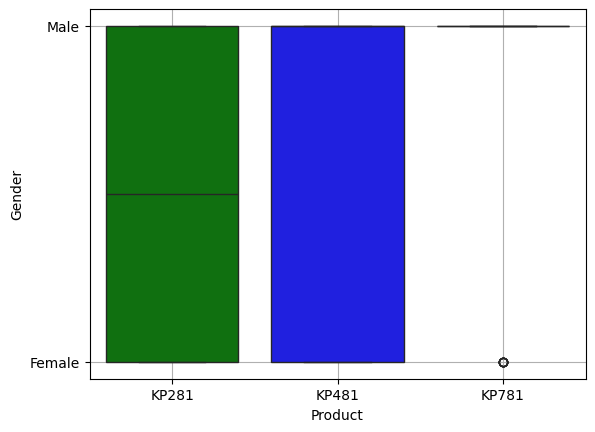

In [ ]:
sns.boxplot(x=df['Product'], y=df["Gender"], palette=my_pallette, hue=df["Product"])
plt.grid()

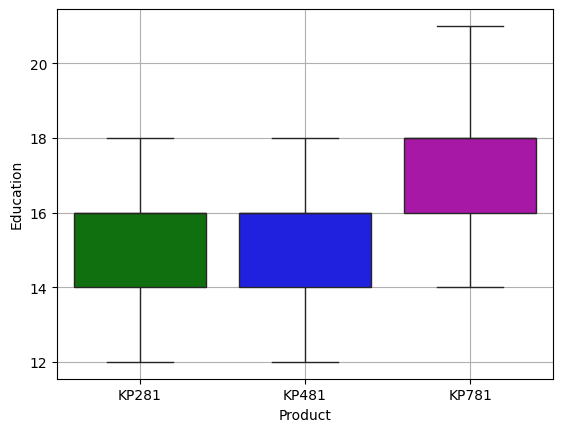

In [ ]:
sns.boxplot(x=df['Product'], y=df["Education"], palette=my_pallette, hue=df["Product"])
plt.grid()

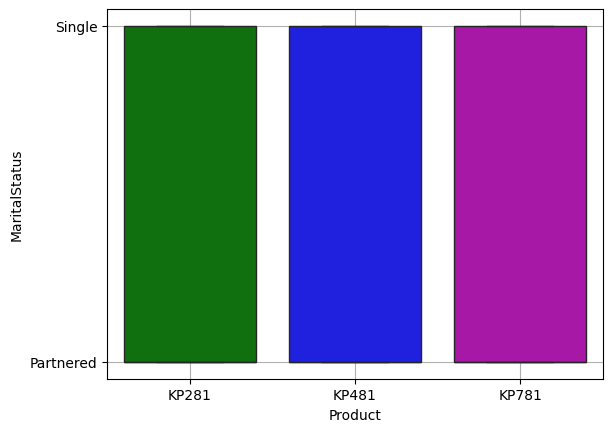

In [ ]:
sns.boxplot(x=df['Product'], y=df["MaritalStatus"], palette=my_pallette, hue=df["Product"])
plt.grid()

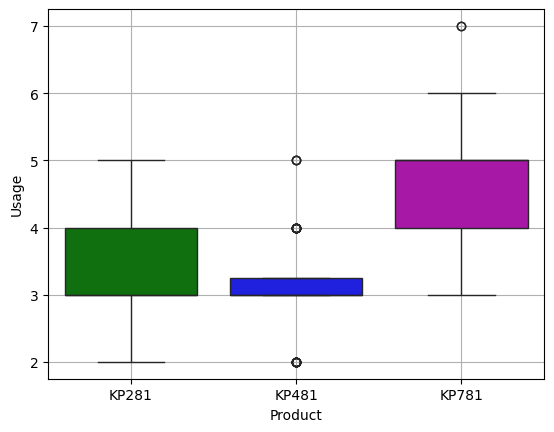

In [ ]:
sns.boxplot(x=df['Product'], y=df["Usage"], palette=my_pallette, hue=df["Product"])
plt.grid()

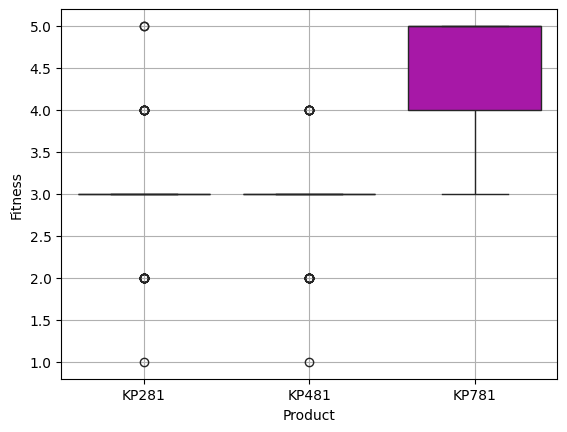

In [ ]:
sns.boxplot(x=df['Product'], y=df["Fitness"], palette=my_pallette, hue=df["Product"])
plt.grid()

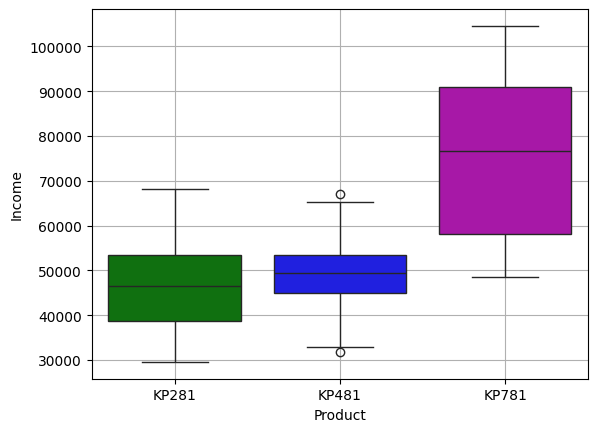

In [ ]:
sns.boxplot(x=df['Product'], y=df["Income"], palette=my_pallette, hue=df["Product"])
plt.grid()

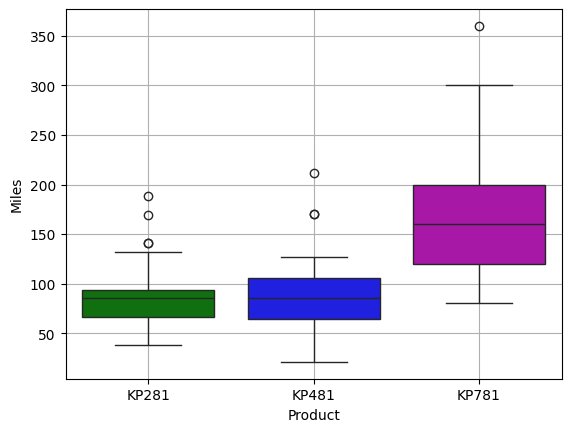

In [ ]:
sns.boxplot(x=df['Product'], y=df["Miles"], palette=my_pallette, hue=df["Product"])
plt.grid()

#### Answer
* Age Distribution: All 3 products are bought by younger customers (median age below 30),  the KP781 has smaller range comapred to the other 2 products.
* Education: Customers across all products have a similar range of education (14 to 16 years), though KP781 buyers show slightly higher education levels.
* Usage: The usage patterns are quite consistent across all products, with most users planning to use their treadmills between 3 to 5 times per week.
* Income: As expected, the KP781 buyers tend to have higher incomes (median above 75,000 USD), while KP281 customers have lower incomes (median around 45,000 USD).
* Miles: KP781 customers cover more miles (higher medians and greater range), while KP281 and KP481 customers have lower ranges than the lowest quartile of KP781.


# #4. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

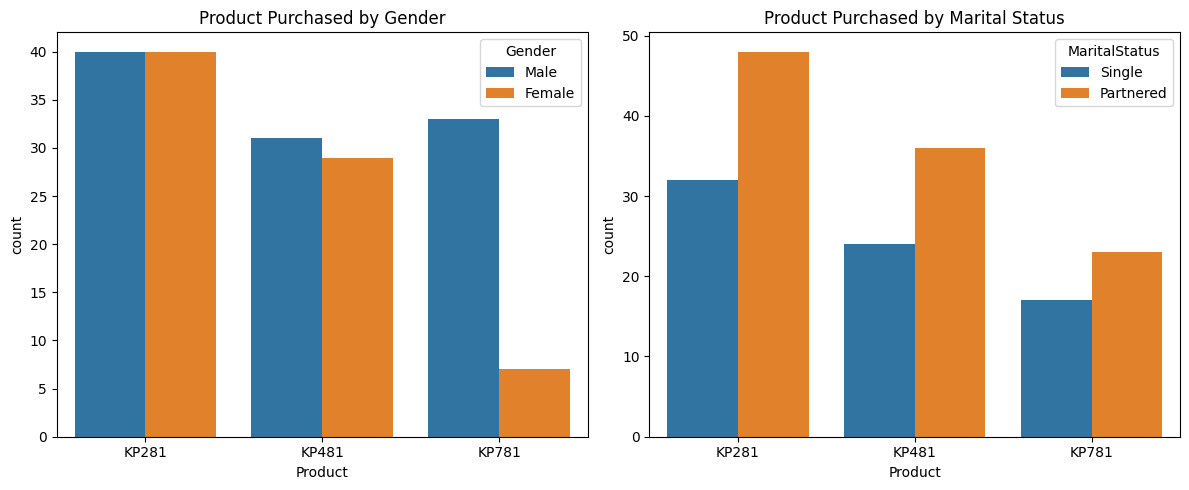

In [ ]:
plt.figure(figsize=(12, 5))

# Gender vs Product
plt.subplot(1, 2, 1)
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Product Purchased by Gender')

# Marital Status vs Product
plt.subplot(1, 2, 2)
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Product Purchased by Marital Status')

plt.tight_layout()
plt.show()

#### Answer
* Gender: There is a higher proportion of male customers purchasing all three treadmill models. However, the distribution across products is quite similar between genders, with a significant edge for males in the KP781 segments.
* Marital Status: Single customers are more likely to buy the entry-level KP281 model, while partnered customers are more inclined toward the higher-end KP781. The mid-range KP481 seems to have a balanced distribution between single and partnered customers.


# #5. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

In [ ]:
# Contingency table for Gender and Product
gender_product_ct = pd.crosstab(df['Product'], df['Gender'], normalize='index')
gender_product_ct

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


In [ ]:
# Contingency table for MaritalStatus and Product
marital_product_ct = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index')
marital_product_ct

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


In [ ]:
# Creating a table for marginal probabilities (percentage of customers buying each product)
product_marginal_prob = df['Product'].value_counts(normalize=True) * 100
product_marginal_prob

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


#### Answer
* Men dominate in KP781 higher end model while the other 2 models are fairly evenly distributed.
* Couples seems to prefer the products more than singles.
* KP281 is most popular product followed by KP481 and then KP781.

# #6. What is the probability of a male customer buying a KP781 treadmill?

In [ ]:
# Calculate the number of male customers who bought KP781
male_kp781_count = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')].shape[0]

# Calculate the total number of male customers
total_male_count = df[df['Gender'] == 'Male'].shape[0]

# Probability of a male customer buying a KP781
prob_male_kp781 = male_kp781_count / total_male_count

prob_male_kp781


0.3173076923076923

#### Answer
* There is 32% that a male customer would buy a KP781 Treadmill.

# #7. Check correlation among different factors using heat maps or pair plots.

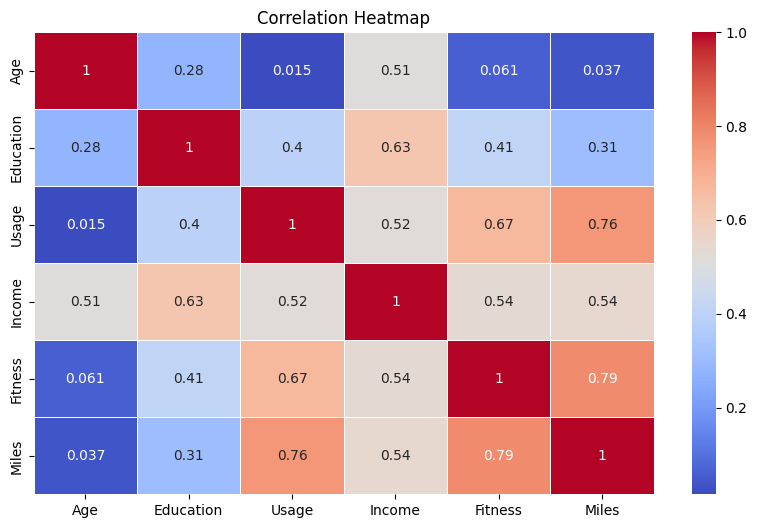

In [ ]:
# Selecting relevant numerical columns
numerical_cols = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Answer
* High correlation between fitness, usage vs miles which is expected. The more you run more fit you are.
* Usage has negative correlation w.r.t age. Also makes sense as you get older you will not be able to move more.
* Higher the education greater the income so sell more to educated people.

# #8. Customer Profiling - Categorization of users.

### #8.1 Manual Segmentation Using Thresholds

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Fitness_Category,Usage_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income,Medium Fitness,Low Usage
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income,Medium Fitness,Low Usage
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income,Medium Fitness,Medium Usage
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income,Medium Fitness,Low Usage
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Income,Low Fitness,Medium Usage


In [ ]:
# Creating categories for Income, Fitness, and Usage
df['Income_Category'] = pd.cut(df['Income'],
                               bins=[0, 50000, 100000, np.inf],
                               labels=['Low Income', 'Medium Income', 'High Income'])

df['Fitness_Category'] = pd.cut(df['Fitness'],
                                bins=[0, 2, 4, 5],
                                labels=['Low Fitness', 'Medium Fitness', 'High Fitness'])

df['Usage_Category'] = pd.cut(df['Usage'],
                              bins=[0, 3, 5, np.inf],
                              labels=['Low Usage', 'Medium Usage', 'High Usage'])

# Combine the categories into one for customer profile
df['Customer_Profile'] = df['Income_Category'].astype(str) + ' | ' + df['Fitness_Category'].astype(str) + ' | ' + df['Usage_Category'].astype(str)

# Display the first few rows to see the segmentation
df[['Income', 'Fitness', 'Usage', 'Customer_Profile']].head()


,Income,Fitness,Usage,Customer_Profile
0,29562,4,3,Low Income | Medium Fitness | Low Usage
1,31836,3,2,Low Income | Medium Fitness | Low Usage
2,30699,3,4,Low Income | Medium Fitness | Medium Usage
3,32973,3,3,Low Income | Medium Fitness | Low Usage
4,35247,2,4,Low Income | Low Fitness | Medium Usage


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Fitness_Category,Usage_Category,Customer_Profile
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income,Medium Fitness,Low Usage,Low Income | Medium Fitness | Low Usage
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income,Medium Fitness,Low Usage,Low Income | Medium Fitness | Low Usage
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income,Medium Fitness,Medium Usage,Low Income | Medium Fitness | Medium Usage
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income,Medium Fitness,Low Usage,Low Income | Medium Fitness | Low Usage
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Income,Low Fitness,Medium Usage,Low Income | Low Fitness | Medium Usage


### #8.2 Categorization by Product Preference

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Product           180 non-null    object  
 1   Age               180 non-null    int64   
 2   Gender            180 non-null    object  
 3   Education         180 non-null    int64   
 4   MaritalStatus     180 non-null    object  
 5   Usage             180 non-null    int64   
 6   Fitness           180 non-null    int64   
 7   Income            180 non-null    int64   
 8   Miles             180 non-null    int64   
 9   Income_Category   180 non-null    category
 10  Fitness_Category  180 non-null    category
 11  Usage_Category    180 non-null    category
 12  Customer_Profile  180 non-null    object  
 13  Age_Group         179 non-null    category
 14  Miles_Group       180 non-null    category
dtypes: category(5), int64(6), object(4)
memory usage: 15.9+ KB


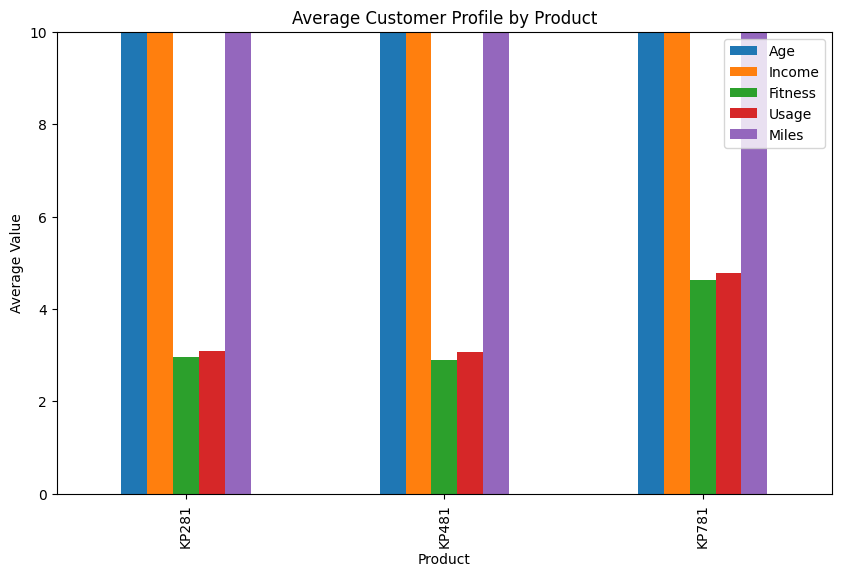

In [ ]:
# Grouping by Product Purchased
grouped_by_product = df.groupby('Product')[['Age', 'Income', 'Fitness', 'Usage', 'Miles']].mean()

# Visualize the average customer profile for each product
grouped_by_product.plot(kind='bar', figsize=(10,6))
plt.title('Average Customer Profile by Product')
plt.ylabel('Average Value')

plt.ylim(0, 10)
plt.show()


### #8.3 Binning and Visualizing

In [ ]:
# Creating bins for Age
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[18, 30, 45, 60, np.inf],
                         labels=['Young', 'Middle-Aged', 'Older', 'Senior'])

# Creating bins for Miles
df['Miles_Group'] = pd.cut(df['Miles'],
                           bins=[0, 10, 20, 30, np.inf],
                           labels=['Low Miles', 'Medium Miles', 'High Miles', 'Very High Miles'])

# Combine these into a customer profile
df['Customer_Profile'] = df['Age_Group'].astype(str) + ' | ' + df['Miles_Group'].astype(str)

df[['Age', 'Miles', 'Customer_Profile']].head()


,Age,Miles,Customer_Profile
0,18,112,nan | Very High Miles
1,19,75,Young | Very High Miles
2,19,66,Young | Very High Miles
3,19,85,Young | Very High Miles
4,20,47,Young | Very High Miles


### #8.4 Pivot Table for Quick Insights

In [ ]:
# Create a pivot table to analyze average metrics by product
pivot = df.pivot_table(index='Product',
                       values=['Age', 'Income', 'Fitness', 'Usage', 'Miles'],
                       aggfunc='mean')

pivot

,Age,Fitness,Income,Miles,Usage
Product,,,,,
KP281,28.55,2.9625,46418.025,82.787500,3.087500
KP481,28.90,2.9000,48973.650,87.933333,3.066667
KP781,29.10,4.6250,75441.575,166.900000,4.775000


#### Answer
* KP781 seems to be the best value product.
* Mostly attractive to young customers with high miles
* Avg age of users seems to be around 28 to 30 for all prodcuts
* KP781 users seem to have high miles and greater useage compared to other 2.

# Recommendations
1. Couples prefer to buy our products.
2. KP781 the highest end model has the best value for customer based on usage and miles covered which shows their satisfaction levels or could be high achiever mentality.
3. Young customers age 28 to 30 seem to buy our products.
4. Sell to health concsious, highly educated customers.
5. Sell high end products to male customers.